# Importação de bibliotecas

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Importando o TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#Import stopwords
from nltk.corpus import stopwords
from time import time

# Import train_test_split function
from sklearn.model_selection import train_test_split


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Leitura do Dataset

In [ ]:
df_frases = pd.read_excel('sample_data/ISEP Sexist Data labeling.xlsx')
df_frases

,Sentences,Label
0,"For a woman, that is good",1
1,Just dress sexy and you will sign any contract.,1
2,Are you having period ?,1
3,Stop being bitchy,1
4,I leave early because of her children instead ...,1
...,...,...
1132,Opportunities are like night owls. They like t...,0
1133,It's not just a question of doing what you lov...,0
1134,A genius does what he masters. An ordinary man...,0
1135,If you want to know the real reasons behind th...,0


# Divisão do dataset entre Treino e Teste

In [ ]:
# Split english dataset into training set and test set
t0 = time()
print("Spliting dataset into train and test ...")
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df_frases['Sentences'], df_frases['Label'], test_size=0.3,random_state=109)
print("done in %0.3fs." % (time() - t0))

Spliting dataset into train and test ...
done in 0.003s.


# Modelo usando Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(max_df=0.95, min_df=2,
                                   stop_words=stopwords.words('english')),  MultinomialNB())

model.fit( X_train, y_train )

y_pred = model.predict( X_test)


# Salvando Predições do Naive Bayes

In [27]:
df_temp = pd.DataFrame(columns=['sentence','predicao','target'])
df_temp['sentence'] = X_test.copy()
df_temp['predicao'] = y_pred
df_temp['target'] = y_test
df_temp.to_csv('predicoes_de_treino_naive_bayes.csv',index=False)

In [26]:
df_temp

,sentence,predicao,target
443,I can't stand working in an office with women ...,1,1
532,That face she just pulled was hideous.,1,1
949,"I've got an overactive brain. I enjoy work, I ...",0,0
182,history shows us that empires fall when women ...,1,1
898,Hard work is often the easy work you did not d...,0,0
...,...,...,...
936,I want to work with kids. I would love to be a...,0,0
1072,"To be great at anything that you do, you have ...",0,0
686,i hate serving women! They're so unbelievanly ...,1,1
247,She thinks like a man but acts like a lady,1,1


# Avaliação do Modelo usando Naive Bayes

In [ ]:
matriz_confusao = metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print("Verdadeiro Negativo, Falso Positivo, Falso Negativo, Verdadeiro Positivo: ",tn, fp, fn, tp)
print("Matriz de confusão: \n",matriz_confusao)
print("Acurária: ",metrics.accuracy_score(y_test, y_pred))
print("Precisão: ",metrics.precision_score(y_test, y_pred))
print("Revocação: ",metrics.recall_score(y_test, y_pred))
print("Medida F: ",metrics.f1_score(y_test, y_pred))

Verdadeiro Negativo, Falso Positivo, Falso Negativo, Verdadeiro Positivo:  107 54 25 156
Matriz de confusão: 
 [[107  54]
 [ 25 156]]
Acurária:  0.7690058479532164
Precisão:  0.7428571428571429
Revocação:  0.861878453038674
Medida F:  0.7979539641943735


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.81      0.66      0.73       161
           1       0.74      0.86      0.80       181

    accuracy                           0.77       342
   macro avg       0.78      0.76      0.76       342
weighted avg       0.77      0.77      0.77       342



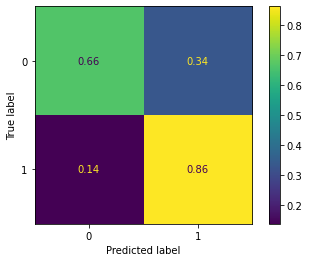

In [ ]:
print(classification_report(y_test, y_pred))

plot_confusion_matrix(model, X_test, y_test, normalize='true')

In [ ]:
def predict_category(s):
    pred = model.predict([s])
    if pred == 1:
      return "A Frase '"+s+ "' é sexista"
    else:  
      return "A Frase '"+s+ "' é neutra/ambígua"
print(predict_category('Why are you getting so emotional?'))

print(predict_category('Why are you so bossy?'))

print(predict_category('You so inteligent'))

print(predict_category('men and women should like this product.'))



A Frase 'Why are you getting so emotional?' é sexista
A Frase 'Why are you so bossy?' é sexista
A Frase 'You so inteligent' é sexista
A Frase 'men and women should like this product.' é sexista


#Salvando o modelo

In [ ]:
# salvar modelo
import pickle
 
# salvar o modelo Naive Bayes no arquivo model_naive_bayes.pkl
with open('model_naive_bayes.pkl', 'wb') as file:
    pickle.dump(model, file)

# Modelo usando uma rede neutral profunda + Word Embedding

##Glove Embeddings

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2021-12-12 18:59:58--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-12-12 18:59:58--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-12-12 18:59:59--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import string

# Model constants.
max_features = 20000
embedding_dim = 100
sequence_length = 500

# function to stardardize texts
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    #stripped_html = tf.strings.regex_replace(lowercase, "<br />", " ")
    #return tf.strings.regex_replace(
    #    stripped_html, "[%s]" % re.escape(string.punctuation), ""
    #)
    return lowercase

# normalize, split, and map strings to integers
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode="int",
    output_sequence_length=sequence_length,
)

# Creating the vocabulary
vectorize_layer.adapt(X_train.values)

In [ ]:
voc = vectorize_layer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [ ]:
embeddings_index = {}
with open("glove.6B.100d.txt") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
num_tokens = len(voc) + 2
#embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix to be used in a Embedding layer
# matrix where entry at index i is the pre-trained vector for the word of index i in our vectorizer's vocabulary
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 1625 words (785 misses)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


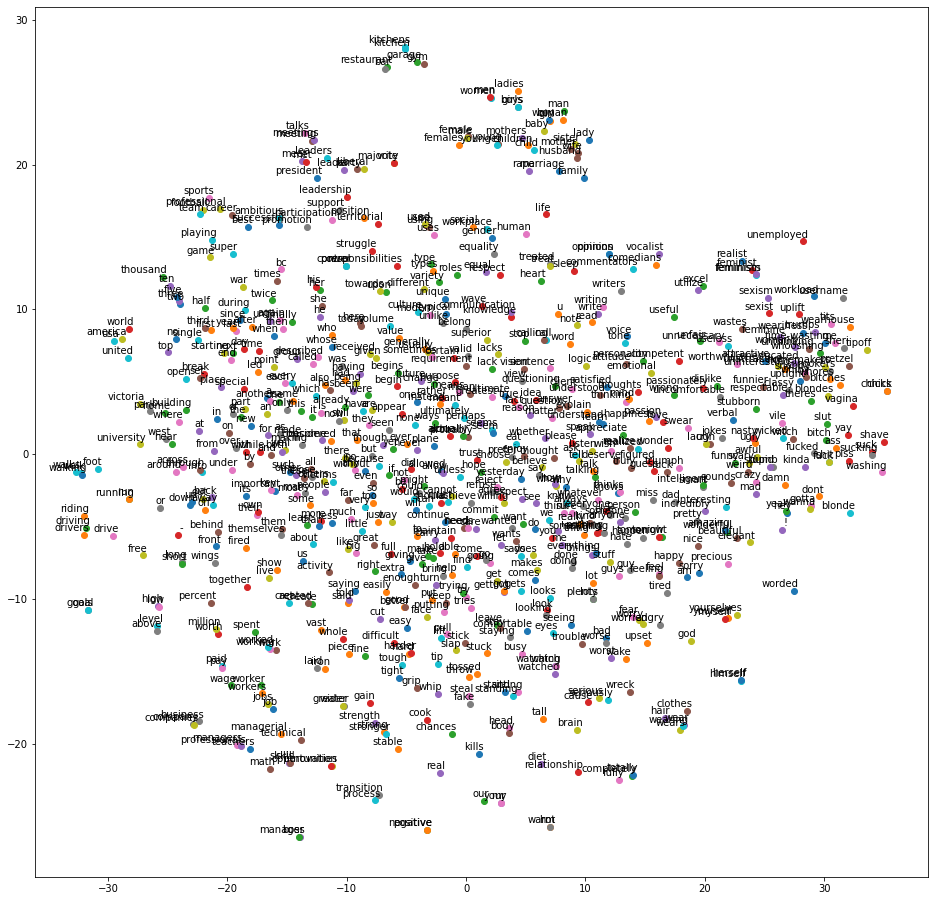

In [ ]:
# Visualizing with T-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline


max_w = 1000
# Creates and TSNE model and plots it
labels = []
tokens = []
for word, i in word_index.items():
    if i == max_w:
        break
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        tokens.append(embedding_vector)
        labels.append(word)
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
plt.figure(figsize=(16, 16))
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
        xy=(x[i], y[i]),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom')
plt.show()

In [ ]:
# load the pre-trained word embeddings matrix into an Embedding layer. trainable = False
from keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
embedding_layer = layers.Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

## Modelo usando camadas de Word Embedding e duas camadas LSTM

In [ ]:

model = Sequential()
# Input for variable-length sequences of integers
model.add(keras.Input(shape=(None,), dtype="int64"))
# load the pre-trained word embeddings matrix into an Embedding layer. trainable = False
model.add(layers.Embedding(num_tokens,embedding_dim, embeddings_initializer=keras.initializers.Constant(embedding_matrix), trainable=False))
# Add 2 bidirectional LSTMs
model.add(layers.Bidirectional(layers.LSTM(32, return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(32)))
# Add a classifier
model.add(layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Vetorizing all the texts
def vectorize_text(text):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text)


# Vectorize the data.
train_ds = vectorize_text(X_train)
test_ds = vectorize_text(X_test)

In [ ]:
X_train

481     I am going to create a restaurant called "Sand...
1087    If you're not aiming at perfection, you're not...
245                      A woman is just as good as a man
131                        Well, karma's a bitch I guess.
76                       For me, she is not strong enough
                              ...                        
298     I wonder which of the blonde molls screwed the...
319     She is actually a bitch, but I had to laugh at...
587                       I need a woman to do my laundry
399     The mine is no place for a woman to work. Call...
141     My frustration with Kat is getting stronger an...
Name: Sentences, Length: 795, dtype: object

In [ ]:
train_ds

<tf.Tensor: shape=(795, 500), dtype=int64, numpy=
array([[   6,  201,  105, ...,    0,    0,    0],
       [  24,   62,   18, ...,    0,    0,    0],
       [   2,   34,    8, ...,    0,    0,    0],
       ...,
       [   6,   94,    2, ...,    0,    0,    0],
       [   4, 1526,    8, ...,    0,    0,    0],
       [  26, 1841,   25, ...,    0,    0,    0]])>

## Treinando e salvando o melhor modelo

In [ ]:
# Train
#Salvar o melhor modelo
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1)
]

history = model.fit(
    train_ds, y_train, 
    epochs=20, 
    verbose=1,
    callbacks = callbacks_list,
    validation_data=(test_ds, y_test))

Epoch 1/20
25/25 [==============================] - ETA: 0s - loss: 0.6808 - accuracy: 0.6025
Epoch 00001: val_loss improved from inf to 0.65170, saving model to model.h5
25/25 [==============================] - 30s 913ms/step - loss: 0.6808 - accuracy: 0.6025 - val_loss: 0.6517 - val_accuracy: 0.7339
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 0.5849 - accuracy: 0.7233
Epoch 00002: val_loss improved from 0.65170 to 0.50091, saving model to model.h5
25/25 [==============================] - 21s 843ms/step - loss: 0.5849 - accuracy: 0.7233 - val_loss: 0.5009 - val_accuracy: 0.7749
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 0.4762 - accuracy: 0.7836
Epoch 00003: val_loss improved from 0.50091 to 0.46096, saving model to model.h5
25/25 [==============================] - 21s 844ms/step - loss: 0.4762 - accuracy: 0.7836 - val_loss: 0.4610 - val_accuracy: 0.8041
Epoch 4/20
25/25 [==============================] - ETA: 0s - loss: 0.4427 - accura

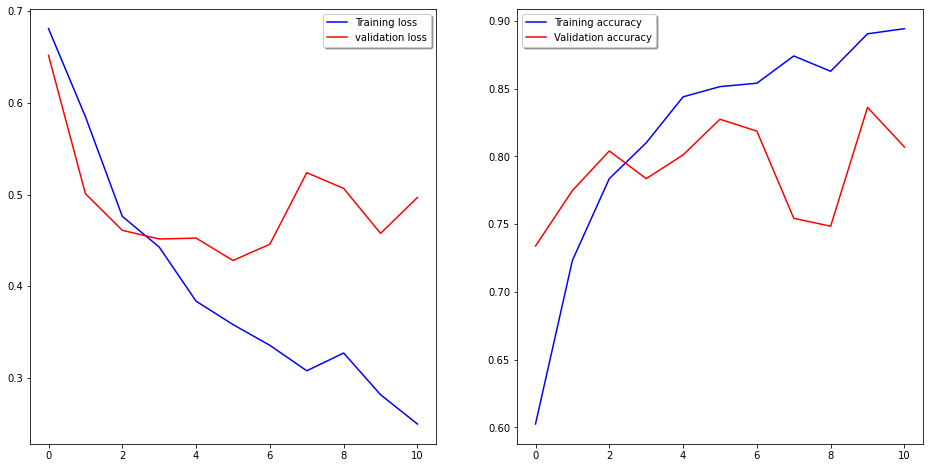

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('model.h5')

y_pred = model.predict(test_ds)
y_pred = [1 if x >=0.5 else 0 for x in y_pred]
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       161
           1       0.82      0.86      0.84       181

    accuracy                           0.83       342
   macro avg       0.83      0.83      0.83       342
weighted avg       0.83      0.83      0.83       342



## Salvando predições do treino de modelo de DL

In [ ]:
df_temp = X_test.copy()
df_temp['predicao'] = y_pred
df_temp['target'] = y_test
df_temp.to_csv('predicoes_de_treino.csv',index=False)

## Avaliação do Modelo

In [ ]:
matriz_confusao = metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print("Verdadeiro Negativo, Falso Positivo, Falso Negativo, Verdadeiro Positivo: ",tn, fp, fn, tp)
print("Matriz de confusão: \n",matriz_confusao)
print("Acurária: ",metrics.accuracy_score(y_test, y_pred))
print("Precisão: ",metrics.precision_score(y_test, y_pred))
print("Revocação: ",metrics.recall_score(y_test, y_pred))
print("Medida F: ",metrics.f1_score(y_test, y_pred))

Verdadeiro Negativo, Falso Positivo, Falso Negativo, Verdadeiro Positivo:  128 33 26 155
Matriz de confusão: 
 [[128  33]
 [ 26 155]]
Acurária:  0.827485380116959
Precisão:  0.824468085106383
Revocação:  0.856353591160221
Medida F:  0.840108401084011


In [ ]:
def predict_category_word_embedding(s):
    texto_vetorizado = vectorize_text(s)
    pred = model.predict(texto_vetorizado)
    if (pred[0][0] >=0.5):
      return 'A frase "'+s+ '" é sexista'
    else:
      return 'A frase "'+s+'" é neutra/ambígua'

print(predict_category_word_embedding('Why are you getting so emotional?'))

print(predict_category_word_embedding('Why are you so bossy?'))

print(predict_category_word_embedding('You so inteligent'))

print(predict_category_word_embedding('men and women should like this product.'))

A frase "Why are you getting so emotional?" é sexista
A frase "Why are you so bossy?" é neutra/ambígua
A frase "You so inteligent" é neutra/ambígua
A frase "men and women should like this product." é sexista
